In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset

In [2]:
df = pd.read_csv('movies_metadata.csv')
df.head()


C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df1 = pd.read_csv('credits.csv')
df1.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
df2 = pd.read_csv('keywords.csv')
df2.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [5]:
df3 = pd.read_csv('links_small.csv')
df3.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
df4 = pd.read_csv('ratings_small.csv')
df4.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
print(df.isnull().sum())
print(df4.isnull().sum())
print(df.duplicated().sum())
print(df4.duplicated().sum())
#droping null values
df.drop_duplicates(keep=False, inplace=True)
print(df.duplicated().sum())
print()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
13
0
0



In [8]:
dff = df3.merge(df4,on='movieId')
dff.rename(columns = {'movieId':'id'}, inplace = True)
dff

,id,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.0,7,3.0,851866703
1,1,114709,862.0,9,4.0,938629179
2,1,114709,862.0,13,5.0,1331380058
3,1,114709,862.0,15,2.0,997938310
4,1,114709,862.0,19,3.0,855190091
...,...,...,...,...,...,...
99999,161944,255313,159550.0,287,5.0,1470167824
100000,162376,4574334,410612.0,73,4.5,1474255532
100001,162542,5165344,392572.0,611,5.0,1471520667
100002,162672,3859980,402672.0,611,3.0,1471523986


In [9]:
dff['id'] = pd.to_numeric(dff['id'])
tf = df[['title','id']]
tf=tf.dropna().reset_index(drop=True)
tf['id'] = pd.to_numeric(tf['id'])
tf = dff.merge(tf,on='id')
tf

,id,imdbId,tmdbId,userId,rating,timestamp,title
0,2,113497,8844.0,15,2.0,1134521380,Ariel
1,2,113497,8844.0,19,3.0,855194773,Ariel
2,2,113497,8844.0,30,2.0,945277634,Ariel
3,2,113497,8844.0,32,4.0,834828285,Ariel
4,2,113497,8844.0,41,3.5,1093888283,Ariel
...,...,...,...,...,...,...,...
44989,142507,1596345,245698.0,15,3.0,1465793179,Exit
44990,148652,2479478,347969.0,402,2.5,1462946405,The Eleventh Victim
44991,158238,3799694,290250.0,15,3.5,1465794051,Stolen Seas
44992,158238,3799694,290250.0,73,4.0,1470719796,Stolen Seas


In [10]:
num_rating = tf.groupby('title').count()['rating'].reset_index()
num_rating.rename(columns={'rating':'num_rating'},inplace=True)
num_rating

,title,num_rating
0,!Women Art Revolution,2
1,'Gator Bait,1
2,'Twas the Night Before Christmas,2
3,...And God Created Woman,1
4,00 Schneider - Jagd auf Nihil Baxter,2
...,...,...
2789,xXx,28
2790,¡Three Amigos!,1
2791,À nos amours,14
2792,Ödipussi,1


In [11]:
avg_rating = tf.groupby('title').mean()['rating'].reset_index()
avg_rating.rename(columns={'rating':'avg_rating'},inplace=True)
avg_rating

,title,avg_rating
0,!Women Art Revolution,3.250000
1,'Gator Bait,0.500000
2,'Twas the Night Before Christmas,4.000000
3,...And God Created Woman,4.000000
4,00 Schneider - Jagd auf Nihil Baxter,4.000000
...,...,...
2789,xXx,3.517857
2790,¡Three Amigos!,4.000000
2791,À nos amours,3.285714
2792,Ödipussi,4.500000


In [12]:
popular_df = num_rating.merge(avg_rating,on='title')
popular_df = popular_df[popular_df['num_rating']>=150].sort_values('avg_rating',ascending=False)
popular_df = popular_df.merge(df,on='title').drop_duplicates('title')[['title','homepage','release_date','id']]


In [13]:
kf = popular_df.reset_index()
popular_df = kf[['title','homepage','release_date','id']]
popular_df

,title,homepage,release_date,id
0,Sleepless in Seattle,NaN,1993-06-24,858
1,The Million Dollar Hotel,NaN,2000-02-09,318
2,Once Were Warriors,NaN,1994-09-02,527
3,The Thomas Crown Affair,NaN,1999-08-06,913
4,Men in Black II,http://www.sonypictures.com/homevideo/meninbla...,2002-07-03,608
5,Terminator 3: Rise of the Machines,NaN,2003-07-02,296
6,The 39 Steps,NaN,1935-06-01,260
7,5 Card Stud,NaN,1968-07-28,4993
8,License to Wed,http://licensetowedthemovie.warnerbros.com/,2007-07-04,2959
9,Solaris,NaN,1972-03-20,593


In [14]:
df1[['cast']]
print(type(df1[['cast']]))
#
direc_df = df1[['crew']]
row, col = direc_df.shape
print(type(direc_df))
print(row)
#
direc = df1[['crew']].iloc[0]['crew']
print(type(direc))

# ls = ast.literal_eval(direc)
# print(ls[0]['name'])
print(row)

#
df1.isnull().sum()
df1.duplicated('id').sum()
df1_mod = df1.drop_duplicates('id')
df1_mod.duplicated('id').sum()
print(len(direc_df))

#
direc_df = df1[['crew']]
row, col = direc_df.shape
print(type(direc_df))
print(row)
import ast
direc_ls = []
direc = direc_df.iloc[45474]['crew']
ls1 = ast.literal_eval(direc)
for i in ls1:
#     print(i)
    if i['job'] == 'Director':
        print(i['name'])

#
direc_ls = []
for j in range(len(direc_df)):
    direc = direc_df.iloc[j]['crew']
    ls1 = ast.literal_eval(direc)
    f = 0
    for i in ls1:
        if i['job'] == 'Director':
            direc_ls.append(i['name'])
            f = 1
            break
    if f == 0:
        direc_ls.append('')

#
direc_df = pd.DataFrame(direc_ls)
direc_ls
print(len(direc_ls))
df1 = pd.concat([df1,direc_df],axis=1)
df1.rename(columns = {0:'Director'}, inplace = True)
df1
#
cast_df = df1[['cast']]
cast_df
import ast
cast_ls = []
for j in range(len(cast_df)):
    cast_sub = ''
    cast = cast_df.iloc[j]['cast']
    ls2 = ast.literal_eval(cast)
    for i in ls2:
        if i['name']:
            cast_sub = cast_sub + ' ' + i['name']
    cast_ls.append(cast_sub)
    
#
cast_df_mod = pd.DataFrame(cast_ls)
#
df1 = pd.concat([df1,cast_df_mod],axis=1)
df1.rename(columns = {0:'Allcast'}, inplace = True)
#
df1_res = df1[['crew','id','Director','Allcast']]
df1_res
#
temp_df = df[['belongs_to_collection','genres','id','title','spoken_languages','original_language']]
#
id_df = temp_df[['id']]
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
num = []
for i in range(len(id_df)):
    if RepresentsInt(id_df.iloc[i]['id']):
         num.append(int(id_df.iloc[i]['id']))
    else:
        num.append('')
        
#
id_df = pd.DataFrame(num)
id_df.rename(columns={0:'id'},inplace=True)
id_df

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
45476
<class 'str'>
45476
45476
<class 'pandas.core.frame.DataFrame'>
45476
Yakov Protazanov
45476


,id
0,862
1,8844
2,15602
3,31357
4,11862
...,...
45436,439050
45437,111109
45438,67758
45439,227506


In [15]:
temp1_df = df[['belongs_to_collection','genres','title','spoken_languages','original_language']]
temp1_df = pd.concat([temp1_df,id_df],axis=1)
temp1_df
df1_res.head()

#
final_df =  temp1_df.merge(df1_res,on='id')
gen_df = final_df[['genres','id']]
gen_df.dropna()
gen_df.dropna(inplace=True)
gen_df.isnull().sum()
gen_df
gen_ls = []
for j in range(len(gen_df)):
    gen_sub = ''
    gen1 = gen_df.iloc[j]['genres']
    ls4 = ast.literal_eval(gen1)
    for i in ls4:
        if i['name'] :
            gen_sub = gen_sub + ' ' + i['name']
    gen_ls.append(gen_sub)

len(gen_ls)
gen_ls_df = pd.DataFrame(gen_ls)
gen_ls_df.rename(columns={0:'genresM'},inplace=True)
gen_ls_df

<ipython-input-15-fe8c30226d15>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df.dropna(inplace=True)


,genresM
0,Animation Comedy Family
1,Adventure Fantasy Family
2,Romance Comedy
3,Comedy Drama Romance
4,Comedy
...,...
45455,Action Mystery Thriller Horror
45456,Family Animation Romance Comedy
45457,Drama
45458,Drama Fantasy Horror


In [16]:
gen_mod_df = pd.concat([gen_df,gen_ls_df],axis = 1)
gen_mod_df
gen_res_df = gen_mod_df[['id','genresM']]
final_mod_df = final_df.merge(gen_res_df,on='id')
final_mod_df.head()

,belongs_to_collection,genres,title,spoken_languages,original_language,id,crew,Director,Allcast,genresM
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'iso_639_1': 'en', 'name': 'English'}]",en,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wa...,Animation Comedy Family
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,Robin Williams Jonathan Hyde Kirsten Dunst Br...,Adventure Fantasy Family
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'iso_639_1': 'en', 'name': 'English'}]",en,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,Walter Matthau Jack Lemmon Ann-Margret Sophia...,Romance Comedy
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'iso_639_1': 'en', 'name': 'English'}]",en,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,Whitney Houston Angela Bassett Loretta Devine...,Comedy Drama Romance
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'iso_639_1': 'en', 'name': 'English'}]",en,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,Steve Martin Diane Keaton Martin Short Kimber...,Comedy


In [17]:
tag_df = final_mod_df[['id','belongs_to_collection']]
final_mod_df.head()

,belongs_to_collection,genres,title,spoken_languages,original_language,id,crew,Director,Allcast,genresM
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'iso_639_1': 'en', 'name': 'English'}]",en,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wa...,Animation Comedy Family
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,Robin Williams Jonathan Hyde Kirsten Dunst Br...,Adventure Fantasy Family
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'iso_639_1': 'en', 'name': 'English'}]",en,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,Walter Matthau Jack Lemmon Ann-Margret Sophia...,Romance Comedy
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'iso_639_1': 'en', 'name': 'English'}]",en,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,Whitney Houston Angela Bassett Loretta Devine...,Comedy Drama Romance
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'iso_639_1': 'en', 'name': 'English'}]",en,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,Steve Martin Diane Keaton Martin Short Kimber...,Comedy


In [18]:
selected_features = ['genresM','Allcast','Director','original_language'];
print(selected_features)
for feature in selected_features:
    final_mod_df[feature] = final_mod_df[feature].fillna('')
combined_features = final_mod_df['genresM'] + ' ' + final_mod_df['Allcast'] + ' ' + final_mod_df['Director'] + ' ' + final_mod_df['original_language']
print(combined_features)




['genresM', 'Allcast', 'Director', 'original_language']
0         Animation Comedy Family  Tom Hanks Tim Allen ...
1         Adventure Fantasy Family  Robin Williams Jona...
2         Romance Comedy  Walter Matthau Jack Lemmon An...
3         Comedy Drama Romance  Whitney Houston Angela ...
4         Comedy  Steve Martin Diane Keaton Martin Shor...
                               ...                        
45687      Leila Hatami Kourosh Tahami Elham Korda Hami...
45688      Angel Aquino Perry Dizon Hazel Orencio Joel ...
45689      Erika Eleniak Adam Baldwin Julie du Page Jam...
45690      Iwan Mosschuchin Nathalie Lissenko Pavel Pav...
45691                                     Daisy Asquith en
Length: 45692, dtype: object


In [19]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 29821)	0.03840748644171989
  (0, 57543)	0.2530421756641376
  (0, 48208)	0.250026035500796
  (0, 78257)	0.18411026681714857
  (0, 33849)	0.16441113656212994
  (0, 88701)	0.13549144403292593
  (0, 30230)	0.2301834119397696
  (0, 58204)	0.10507269904133175
  (0, 67432)	0.22681165410254295
  (0, 57741)	0.18061156041440743
  (0, 25287)	0.26464936636326414
  (0, 106998)	0.14816592906664056
  (0, 30166)	0.16696746136548926
  (0, 69951)	0.1551513145954693
  (0, 80717)	0.2232286270067031
  (0, 3845)	0.17327682199276476
  (0, 83363)	0.22556681212535667
  (0, 48493)	0.23211817726434578
  (0, 91882)	0.16356077142556352
  (0, 107619)	0.15845808522065524
  (0, 105191)	0.24143498496501112
  (0, 48218)	0.12702775163808958
  (0, 84672)	0.23748017531103724
  (0, 26704)	0.12848688797707877
  (0, 2441)	0.1351012491512763
  :	:
  (45689, 64169)	0.09320878299877243
  (45689, 109724)	0.1247901986753357
  (45689, 47955)	0.11951156102918385
  (45689, 48426)	0.09768790741225922
  (45689, 78645)	0.08155373

In [20]:
df4.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [21]:
final_mod_df.head()
print(final_mod_df.shape)
con_df = final_mod_df

(45692, 10)


In [22]:
print(final_mod_df.shape)
print(df3.shape)

(45692, 10)
(9125, 3)


In [23]:
final_mod_df.isnull().sum()

belongs_to_collection    41174
genres                       0
title                        6
spoken_languages             6
original_language            0
id                           0
crew                         0
Director                     0
Allcast                      0
genresM                      0
dtype: int64

In [24]:
df4.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [25]:
final_mod_df.duplicated().sum()

148

In [26]:
df4.duplicated().sum()

0

In [27]:
final_mod_df.drop_duplicates()

,belongs_to_collection,genres,title,spoken_languages,original_language,id,crew,Director,Allcast,genresM
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'iso_639_1': 'en', 'name': 'English'}]",en,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wa...,Animation Comedy Family
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,Robin Williams Jonathan Hyde Kirsten Dunst Br...,Adventure Fantasy Family
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'iso_639_1': 'en', 'name': 'English'}]",en,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,Walter Matthau Jack Lemmon Ann-Margret Sophia...,Romance Comedy
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'iso_639_1': 'en', 'name': 'English'}]",en,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,Whitney Houston Angela Bassett Loretta Devine...,Comedy Drama Romance
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'iso_639_1': 'en', 'name': 'English'}]",en,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,Steve Martin Diane Keaton Martin Short Kimber...,Comedy
...,...,...,...,...,...,...,...,...,...,...
45687,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",The Final Storm,"[{'iso_639_1': 'en', 'name': 'English'}]",en,439050,"[{'credit_id': '5894a97d925141426c00818c', 'de...",Hamid Nematollah,Leila Hatami Kourosh Tahami Elham Korda,
45688,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",In a Heartbeat,"[{'iso_639_1': 'en', 'name': 'English'}]",en,111109,"[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",Lav Diaz,Angel Aquino Perry Dizon Hazel Orencio Joel T...,
45689,NaN,"[{'id': 18, 'name': 'Drama'}]","Blood, Sweat and Tears","[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",nl,67758,"[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",Mark L. Lester,Erika Eleniak Adam Baldwin Julie du Page Jame...,
45690,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",Jungle Woman,"[{'iso_639_1': 'en', 'name': 'English'}]",en,227506,"[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",Yakov Protazanov,Iwan Mosschuchin Nathalie Lissenko Pavel Pavl...,


Popularity Based RCS

In [28]:
ratings = dff
ratings.head()

,id,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.0,7,3.0,851866703
1,1,114709,862.0,9,4.0,938629179
2,1,114709,862.0,13,5.0,1331380058
3,1,114709,862.0,15,2.0,997938310
4,1,114709,862.0,19,3.0,855190091


In [29]:
ratings_with_name = ratings.merge(final_mod_df,on='id')
ratings_with_name.head()

,id,imdbId,tmdbId,userId,rating,timestamp,belongs_to_collection,genres,title,spoken_languages,original_language,crew,Director,Allcast,genresM
0,2,113497,8844.0,15,2.0,1134521380,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
1,2,113497,8844.0,19,3.0,855194773,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
2,2,113497,8844.0,30,2.0,945277634,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
3,2,113497,8844.0,32,4.0,834828285,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
4,2,113497,8844.0,41,3.5,1093888283,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime


In [30]:
num_rating_df = ratings_with_name.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating' : 'num_rating'},inplace=True)
num_rating_df

,title,num_rating
0,'Til Madness Do Us Part,18
1,10 MPH,4
2,10 Things I Hate About You,37
3,1000 Journals,6
4,12,2
...,...,...
2808,Zombie Ninjas vs Black Ops,46
2809,Zozo,1
2810,Zyzzyx Road,7
2811,loudQUIETloud: A Film About the Pixies,1


In [31]:
avg_rating_df = ratings_with_name.groupby('title').mean()['rating'].reset_index()
avg_rating_df.rename(columns={'rating' : 'avg_rating'},inplace=True)
avg_rating_df

,title,avg_rating
0,'Til Madness Do Us Part,3.527778
1,10 MPH,3.125000
2,10 Things I Hate About You,3.851351
3,1000 Journals,3.000000
4,12,3.500000
...,...,...
2808,Zombie Ninjas vs Black Ops,3.739130
2809,Zozo,0.500000
2810,Zyzzyx Road,2.785714
2811,loudQUIETloud: A Film About the Pixies,4.500000


In [32]:
popular_mod_df = num_rating_df.merge(avg_rating_df,on='title')
popular_mod_df

,title,num_rating,avg_rating
0,'Til Madness Do Us Part,18,3.527778
1,10 MPH,4,3.125000
2,10 Things I Hate About You,37,3.851351
3,1000 Journals,6,3.000000
4,12,2,3.500000
...,...,...,...
2808,Zombie Ninjas vs Black Ops,46,3.739130
2809,Zozo,1,0.500000
2810,Zyzzyx Road,7,2.785714
2811,loudQUIETloud: A Film About the Pixies,1,4.500000


In [33]:
popular_mod_df=popular_mod_df[popular_mod_df['num_rating'] >= 125].sort_values('avg_rating',ascending=False)
popular_mod_df.head()
print(popular_mod_df.shape)
popular_mod_df.head()

(50, 3)


,title,num_rating,avg_rating
1805,Sleepless in Seattle,200,4.487500
1032,In the Mood for Love,311,4.487138
1511,Once Were Warriors,244,4.303279
2801,Zebrahead,224,4.256696
1199,"Legally Blonde 2: Red, White & Blonde",324,4.256173


In [34]:
popular_final_df = popular_mod_df.merge(final_mod_df,on='title').drop_duplicates('title')[['title','Director','num_rating','avg_rating']]
popular_final_df.head()

,title,Director,num_rating,avg_rating
0,Sleepless in Seattle,Nora Ephron,200,4.487500
1,In the Mood for Love,Wim Wenders,311,4.487138
2,Once Were Warriors,Lee Tamahori,244,4.303279
3,Zebrahead,Barry Sonnenfeld,224,4.256696
4,"Legally Blonde 2: Red, White & Blonde",Jonathan Mostow,324,4.256173


COLLABORATIVE RCS

In [35]:
val = ratings_with_name.groupby('userId').count()['rating'] > 100
rated_users = val[val].index

In [36]:
filtered_rating = ratings_with_name[ratings_with_name['userId'].isin(rated_users)]
print(filtered_rating.shape)
filtered_rating.head()

(25497, 15)


,id,imdbId,tmdbId,userId,rating,timestamp,belongs_to_collection,genres,title,spoken_languages,original_language,crew,Director,Allcast,genresM
0,2,113497,8844.0,15,2.0,1134521380,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
1,2,113497,8844.0,19,3.0,855194773,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
2,2,113497,8844.0,30,2.0,945277634,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
6,2,113497,8844.0,48,3.5,1322169967,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
12,2,113497,8844.0,73,2.5,1255595527,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime


In [37]:
y = filtered_rating.groupby('title').count()['rating'] >= 30
fam_movies = y[y].index

In [38]:
final_ratings = filtered_rating[filtered_rating['title'].isin(fam_movies)]
final_ratings

,id,imdbId,tmdbId,userId,rating,timestamp,belongs_to_collection,genres,title,spoken_languages,original_language,crew,Director,Allcast,genresM
0,2,113497,8844.0,15,2.0,1134521380,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
1,2,113497,8844.0,19,3.0,855194773,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
2,2,113497,8844.0,30,2.0,945277634,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
6,2,113497,8844.0,48,3.5,1322169967,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
12,2,113497,8844.0,73,2.5,1255595527,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43969,58559,468569,155.0,574,4.0,1232809909,NaN,"[{'id': 18, 'name': 'Drama'}]",Spieltrieb,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",de,"[{'credit_id': '55c891c0c3a368040800040f', 'de...",Sylvie Verheyde,Charlotte Gainsbourg Pete Doherty August Dieh...,Drama
43970,58559,468569,155.0,580,5.0,1217949542,NaN,"[{'id': 18, 'name': 'Drama'}]",Spieltrieb,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",de,"[{'credit_id': '55c891c0c3a368040800040f', 'de...",Sylvie Verheyde,Charlotte Gainsbourg Pete Doherty August Dieh...,Drama
43975,58559,468569,155.0,615,4.5,1408778535,NaN,"[{'id': 18, 'name': 'Drama'}]",Spieltrieb,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",de,"[{'credit_id': '55c891c0c3a368040800040f', 'de...",Sylvie Verheyde,Charlotte Gainsbourg Pete Doherty August Dieh...,Drama
43978,58559,468569,155.0,624,3.5,1232881338,NaN,"[{'id': 18, 'name': 'Drama'}]",Spieltrieb,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",de,"[{'credit_id': '55c891c0c3a368040800040f', 'de...",Sylvie Verheyde,Charlotte Gainsbourg Pete Doherty August Dieh...,Drama


In [39]:
final_ratings.drop_duplicates()

,id,imdbId,tmdbId,userId,rating,timestamp,belongs_to_collection,genres,title,spoken_languages,original_language,crew,Director,Allcast,genresM
0,2,113497,8844.0,15,2.0,1134521380,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
1,2,113497,8844.0,19,3.0,855194773,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
2,2,113497,8844.0,30,2.0,945277634,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
6,2,113497,8844.0,48,3.5,1322169967,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
12,2,113497,8844.0,73,2.5,1255595527,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43969,58559,468569,155.0,574,4.0,1232809909,NaN,"[{'id': 18, 'name': 'Drama'}]",Spieltrieb,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",de,"[{'credit_id': '55c891c0c3a368040800040f', 'de...",Sylvie Verheyde,Charlotte Gainsbourg Pete Doherty August Dieh...,Drama
43970,58559,468569,155.0,580,5.0,1217949542,NaN,"[{'id': 18, 'name': 'Drama'}]",Spieltrieb,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",de,"[{'credit_id': '55c891c0c3a368040800040f', 'de...",Sylvie Verheyde,Charlotte Gainsbourg Pete Doherty August Dieh...,Drama
43975,58559,468569,155.0,615,4.5,1408778535,NaN,"[{'id': 18, 'name': 'Drama'}]",Spieltrieb,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",de,"[{'credit_id': '55c891c0c3a368040800040f', 'de...",Sylvie Verheyde,Charlotte Gainsbourg Pete Doherty August Dieh...,Drama
43978,58559,468569,155.0,624,3.5,1232881338,NaN,"[{'id': 18, 'name': 'Drama'}]",Spieltrieb,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",de,"[{'credit_id': '55c891c0c3a368040800040f', 'de...",Sylvie Verheyde,Charlotte Gainsbourg Pete Doherty August Dieh...,Drama


In [40]:
final_ratings.head()

,id,imdbId,tmdbId,userId,rating,timestamp,belongs_to_collection,genres,title,spoken_languages,original_language,crew,Director,Allcast,genresM
0,2,113497,8844.0,15,2.0,1134521380,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
1,2,113497,8844.0,19,3.0,855194773,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
2,2,113497,8844.0,30,2.0,945277634,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
6,2,113497,8844.0,48,3.5,1322169967,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime
12,2,113497,8844.0,73,2.5,1255595527,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",Apartment Zero,"[{'iso_639_1': 'en', 'name': 'English'}]",en,"[{'credit_id': '52fe420dc3a36847f800001f', 'de...",Aki Kaurismäki,Turo Pajala Susanna Haavisto Matti Pellonpää ...,Drama Crime


In [41]:
pt = final_ratings.pivot_table(index='title',columns='userId',values = 'rating')
pt.shape

(236, 121)

In [42]:
pt.fillna(0,inplace=True)

In [43]:
pt

userId,4,15,17,19,23,30,48,56,57,73,...,607,608,615,624,641,648,654,659,664,665
title,,,,,,,,,,,,,,,,,,,,,
2 Fast 2 Furious,0.0,2.0,0.0,3.0,0.0,4.0,0.0,0.0,4.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9 Songs,0.0,3.0,0.0,5.0,4.5,4.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Clockwork Orange,0.0,0.0,0.0,5.0,4.5,5.0,3.5,0.0,0.0,4.5,...,2.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
A Mighty Heart,0.0,5.0,5.0,0.0,3.5,4.0,5.0,4.0,0.0,5.0,...,4.5,5.0,4.5,4.0,0.0,2.5,5.0,0.0,5.0,5.0
Adjust Your Tracking: The Untold Story of the VHS Collector,0.0,2.5,0.0,0.0,4.5,0.0,3.5,4.0,0.0,4.0,...,0.0,0.0,3.0,3.0,0.0,0.0,4.5,0.0,4.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wrong Turn at Tahoe,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.5,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X-Men: The Last Stand,0.0,3.5,0.0,4.0,3.5,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Young Frankenstein,0.0,2.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,3.0,5.0,0.0,4.0,5.0,0.0,3.0


In [44]:
similarity_score = cosine_similarity(pt)
similarity_score[0]

array([1.        , 0.50516951, 0.54230458, 0.29863513, 0.17088023,
       0.39960665, 0.24533381, 0.38991684, 0.30451159, 0.44846916,
       0.17489663, 0.33778541, 0.4312551 , 0.49042898, 0.46695931,
       0.35283264, 0.37509179, 0.38358727, 0.3167646 , 0.30360443,
       0.41448485, 0.36882834, 0.44331214, 0.47843629, 0.32163439,
       0.37590747, 0.41673424, 0.51077713, 0.37095055, 0.5087982 ,
       0.34969385, 0.3692277 , 0.3518985 , 0.52738758, 0.25052406,
       0.30435699, 0.33108802, 0.35890402, 0.44335359, 0.2946122 ,
       0.36261791, 0.36080972, 0.35248896, 0.4537858 , 0.55584579,
       0.3322654 , 0.41990636, 0.1617323 , 0.39065956, 0.34066848,
       0.29357114, 0.33827556, 0.22310166, 0.35425223, 0.59065775,
       0.25158071, 0.40396195, 0.26843966, 0.38910657, 0.29118151,
       0.39234429, 0.49214439, 0.47843885, 0.31112346, 0.45956404,
       0.50829259, 0.43992322, 0.39023707, 0.42960712, 0.30192959,
       0.40721263, 0.29548018, 0.38284901, 0.34999652, 0.35554

In [45]:
def recommend(movie_name):
    #index fetch
    index = np.where(pt.index==movie_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key = lambda x : x[1], reverse=True)[1:6]
    for i in similar_items:
        print(pt.index[i[0]])

In [46]:
recommend('A Clockwork Orange')

Corvette Summer
Star Trek IV: The Voyage Home
The Sweet Hereafter
In the Mood for Love
Dirty Dancing


In [47]:
recommend('2 Fast 2 Furious')

The Sweet Hereafter
Fat Man and Little Boy
Doom
A Clockwork Orange
Star Wars


In [48]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


CONTENT BASED RCS

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [50]:
content_df = con_df
content_df.head()

,belongs_to_collection,genres,title,spoken_languages,original_language,id,crew,Director,Allcast,genresM
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'iso_639_1': 'en', 'name': 'English'}]",en,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wa...,Animation Comedy Family
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,Robin Williams Jonathan Hyde Kirsten Dunst Br...,Adventure Fantasy Family
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'iso_639_1': 'en', 'name': 'English'}]",en,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,Walter Matthau Jack Lemmon Ann-Margret Sophia...,Romance Comedy
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'iso_639_1': 'en', 'name': 'English'}]",en,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,Whitney Houston Angela Bassett Loretta Devine...,Comedy Drama Romance
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'iso_639_1': 'en', 'name': 'English'}]",en,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,Steve Martin Diane Keaton Martin Short Kimber...,Comedy


In [51]:
content_df.isnull().sum()

belongs_to_collection    41174
genres                       0
title                        6
spoken_languages             6
original_language            0
id                           0
crew                         0
Director                     0
Allcast                      0
genresM                      0
dtype: int64

In [52]:
c1_df = df.merge(content_df,on="title")
print(df['budget'])

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45441, dtype: object


In [53]:
c1_df

,adult,belongs_to_collection_x,budget,genres_x,homepage,id_x,imdb_id,original_language_x,original_title,overview,...,vote_count,belongs_to_collection_y,genres_y,spoken_languages_y,original_language_y,id_y,crew,Director,Allcast,genresM
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,5415.0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_639_1': 'en', 'name': 'English'}]",en,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wa...,Animation Comedy Family
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,2413.0,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,Robin Williams Jonathan Hyde Kirsten Dunst Br...,Adventure Fantasy Family
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,92.0,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_639_1': 'en', 'name': 'English'}]",en,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,Walter Matthau Jack Lemmon Ann-Margret Sophia...,Romance Comedy
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,34.0,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_639_1': 'en', 'name': 'English'}]",en,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,Whitney Houston Angela Bassett Loretta Devine...,Comedy Drama Romance
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,173.0,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]","[{'iso_639_1': 'en', 'name': 'English'}]",en,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,Steve Martin Diane Keaton Martin Short Kimber...,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54683,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",NaN,45527,tt1331329,en,The Final Storm,A stranger named Silas flees from a devastatin...,...,11.0,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...","[{'iso_639_1': 'en', 'name': 'English'}]",en,439050,"[{'credit_id': '5894a97d925141426c00818c', 'de...",Hamid Nematollah,Leila Hatami Kourosh Tahami Elham Korda,
54684,False,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,455661,tt6969946,en,In a Heartbeat,A closeted boy runs the risk of being outed by...,...,146.0,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...","[{'iso_639_1': 'en', 'name': 'English'}]",en,111109,"[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",Lav Diaz,Angel Aquino Perry Dizon Hazel Orencio Joel T...,
54685,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,327237,tt3814486,nl,"Bloed, Zweet en Tranen","Bloed, Zweet en Tranen (Blood, Sweat and Tears...",...,11.0,NaN,"[{'id': 18, 'name': 'Drama'}]","[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",nl,67758,"[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",Mark L. Lester,Erika Eleniak Adam Baldwin Julie du Page Jame...,
54686,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,84710,tt0036975,en,Jungle Woman,Paula the ape woman (Acquanetta) is alive and ...,...,2.0,NaN,"[{'id': 18, 'name':

In [54]:
C = c1_df['vote_average'].mean()
C

5.636273146453537

In [55]:
m = c1_df['vote_count'].quantile(0.9)
m

169.0

In [56]:
movie_list_df = c1_df.copy().loc[c1_df['vote_count'] >= m]
movie_list_df.shape

(5483, 33)

In [57]:
def weighted_rating(x,m=m,C=C):
    v = x['vote_count'];
    R = x['vote_average'];
    
    return (v/(v + m) * R) + (m / (m + v) * C)

In [58]:
movie_list_df['score'] = movie_list_df.apply(weighted_rating, axis = 1)

In [59]:
movie_list_df.head()

,adult,belongs_to_collection_x,budget,genres_x,homepage,id_x,imdb_id,original_language_x,original_title,overview,...,belongs_to_collection_y,genres_y,spoken_languages_y,original_language_y,id_y,crew,Director,Allcast,genresM,score
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_639_1': 'en', 'name': 'English'}]",en,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wa...,Animation Comedy Family,7.637541
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,Robin Williams Jonathan Hyde Kirsten Dunst Br...,Adventure Fantasy Family,6.817285
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]","[{'iso_639_1': 'en', 'name': 'English'}]",en,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,Steve Martin Diane Keaton Martin Short Kimber...,Comedy,5.668509
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",en,949,"[{'credit_id': '52fe4292c3a36847f802916d', 'de...",Michael Mann,Al Pacino Robert De Niro Val Kilmer Jon Voigh...,Action Crime Drama Thriller,7.530282
6,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_639_1': 'en', 'name': 'English'}]",en,17602,[],,,Documentary,7.530282


In [60]:
movie_list_df = movie_list_df.sort_values('score',ascending=False)
movie_list_df[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
572,The Shawshank Redemption,8358.0,8.5,8.443243
1659,The Godfather,6024.0,8.5,8.421852
17254,Dilwale Dulhania Le Jayenge,661.0,9.1,8.394735
20045,The Dark Knight,12269.0,8.3,8.263807
20046,The Dark Knight,12269.0,8.3,8.263807
5512,Fight Club,9678.0,8.3,8.254284
544,Pulp Fiction,8670.0,8.3,8.249070
914,Schindler's List,4436.0,8.3,8.202243
33412,Whiplash,4376.0,8.3,8.200953
33411,Whiplash,4376.0,8.3,8.200953


Text(0.5, 1.0, 'High budget movies')

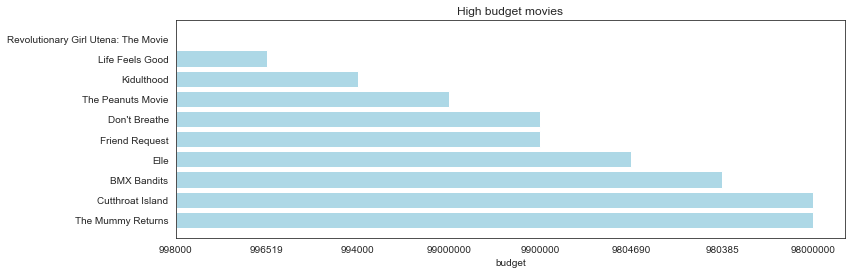

In [61]:
budget = c1_df.sort_values('budget', ascending = False)
plt.figure(figsize=(12,4))
    
plt.barh(budget['title'].head(10),budget['budget'].head(10),align='center',color='lightblue')    
plt.gca().invert_yaxis()
plt.xlabel('budget')
plt.title('High budget movies')

In [62]:
c1_df['overview'].head(10)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
5    Obsessive master thief, Neil McCauley leads a ...
6    Obsessive master thief, Neil McCauley leads a ...
7    Obsessive master thief, Neil McCauley leads a ...
8    Former child star Joe Davis (Joe Dallesandro),...
9    Former child star Joe Davis (Joe Dallesandro),...
Name: overview, dtype: object

In [63]:
tfidf = TfidfVectorizer(stop_words='english')

c1_df['overview'] = c1_df['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(c1_df['overview'])

tfidf_matrix.shape

(54688, 75802)